In [1]:
"""
Author        : Aditya Jain
Date Started  : October 10, 2022
About         : Testing image cropping for training and padding during evaluation; making images square to avoid distortion
"""
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms
import torch
import json
import numpy as np
import cv2

image_path   = 'moth1.jpeg'

/home/mila/a/aditya.jain/.conda/envs/milamoth_ai/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Loading original image

3


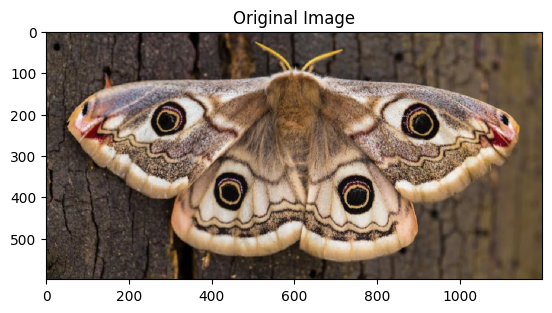

In [3]:
# image loading and processing
image     = Image.open(image_path)
image.save('test/test.jpg')
print(np.shape(image)[2])
plt.title('Original Image')
plt.imshow(image)
plt.savefig('original_image.png')

#### Resizing original image directly

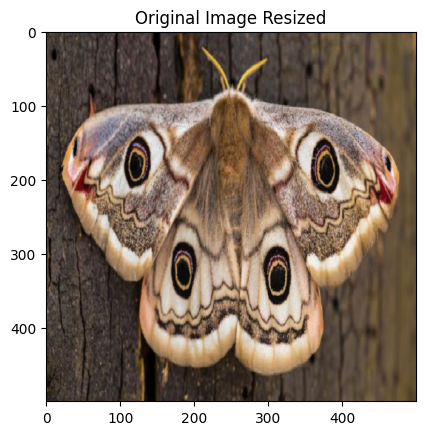

In [3]:
transform = transforms.Resize((500, 500))
img_resized = transform(image)
plt.title('Original Image Resized')
plt.imshow(img_resized)
plt.savefig('original_image_resized.png')

#### Center Cropping and then resizing


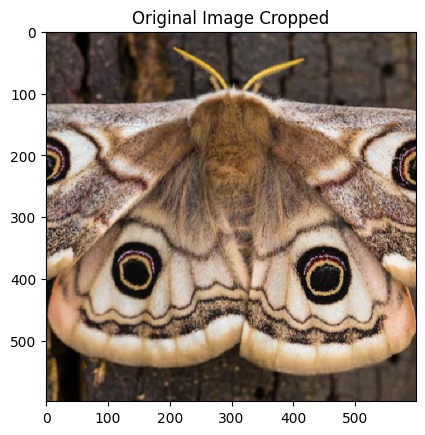

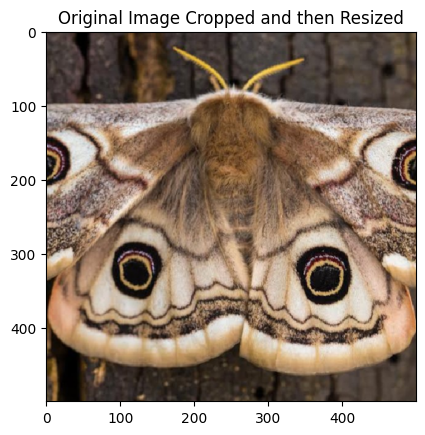

In [4]:
transform1 = transforms.CenterCrop((min(image.size), min(image.size)))
transform2 = transforms.Resize((500, 500))
img_cropped = transform1(image)
plt.figure()
plt.title('Original Image Cropped')
plt.imshow(img_cropped)
plt.savefig('original_image_cropped.png')

plt.figure()
img_cropped_resized = transform2(img_cropped)
plt.title('Original Image Cropped and then Resized')
plt.imshow(img_cropped_resized)
plt.savefig('original_image_cropped_resized.png')

#### Padding during evaluation on trap data

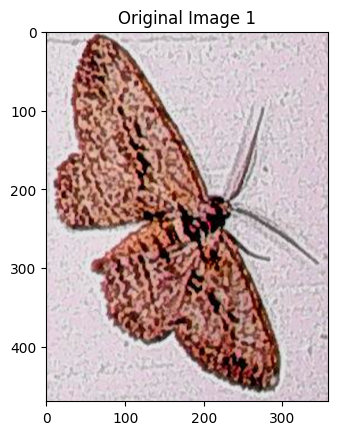

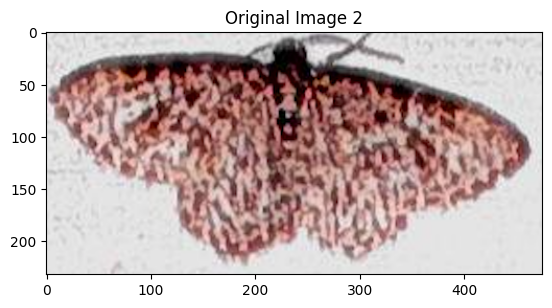

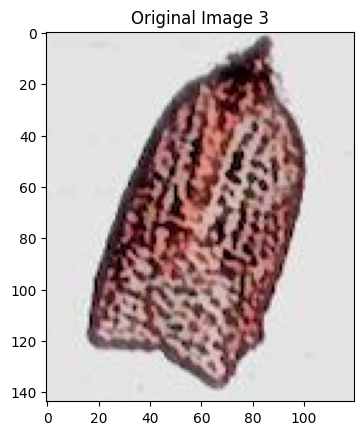

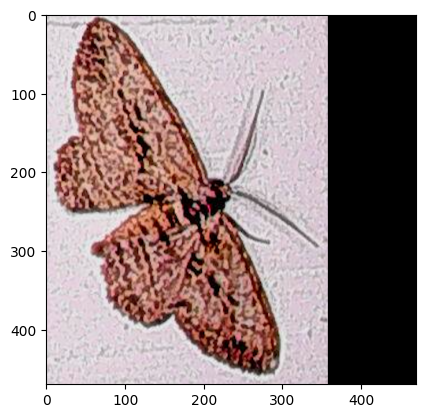

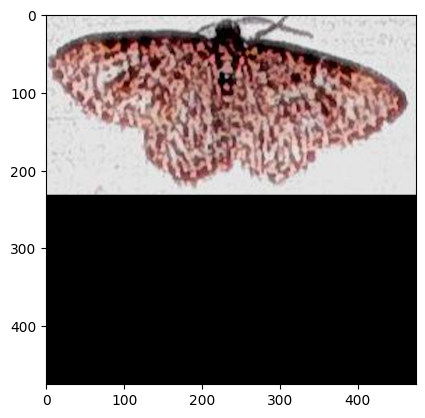

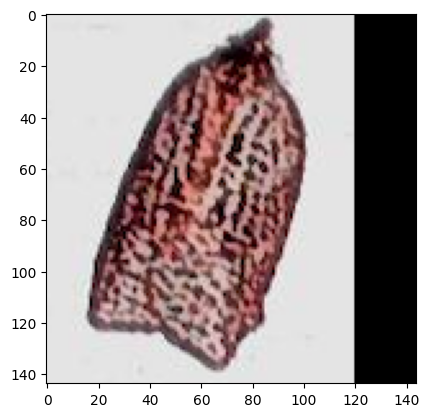

In [25]:
def padding(image):
    """returns the pad transformation required based on image shape"""
    
    height, width = np.shape(image)[0], np.shape(image)[1]
    
    if height<width:    
        pad_transform = transforms.Pad(padding=[0, 0, 0, width-height])
    elif height>width:
        pad_transform = transforms.Pad(padding=[0, 0, height-width, 0])
    else:
        return None
    
    return pad_transform

# Image 1
image1        = Image.open('moth1.png').convert('RGB')
plt.figure()
plt.title('Original Image 1')
plt.imshow(image1)

# Image 2
image2        = Image.open('moth2.png').convert('RGB')
plt.figure()
plt.title('Original Image 2')
plt.imshow(image2)

# Image 3
image3        = Image.open('moth3.png').convert('RGB')
plt.figure()
plt.title('Original Image 3')
plt.imshow(image3)

# Calculate the padding transformations
pad_transform_image1 = padding(image1)
pad_transform_image2 = padding(image2)
pad_transform_image3 = padding(image3)

# Apply transformation, if required
if pad_transform_image1:
    image1 = pad_transform_image1(image1)
if pad_transform_image2:
    image2 = pad_transform_image2(image2)
if pad_transform_image3:
    image3 = pad_transform_image3(image3)
    
plt.figure()
plt.axis('off')
plt.imshow(image1)
plt.savefig('moth1_padded.png')


plt.figure()
plt.axis('off')
plt.imshow(image2)
plt.savefig('moth2_padded.png')


plt.figure()
plt.axis('off')
plt.imshow(image3)
plt.savefig('moth3_padded.png')